In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import finpy_tse as tse
import yfinance as yf
import time

In [18]:
def equal_log(data1, data2):
    l = []
    if len(data1) > len(data2):
        for i in data1:
            for j in data2:
                if i == j:
                    l.append(True)
                    break
            else:
                l.append(False)
    else:
        for i in data2:
            for j in data1:
                if i == j:
                    l.append(True)
                    break
            else:
                l.append(False)
    return np.array(l)


#2
def intersect(data1, data2):
    l = []
    if len(data1) > len(data2):
        for i in data1:
            for j in data2:
                if i == j:
                    l.append(i)
                    break
    else:
        for i in data2:
            for j in data1:
                if i == j:
                    l.append(i)
                    break
    #l = list(set(l))
    return np.array(l)


#3
def mean_exp(data_in):
    p = 1
    n = 0
    for i in data_in:
        if i > 0:
            p *= i
            n += 1
    return p ** (1 / n)

In [19]:
tehran_stock = tse.Get_CWI_History(ignore_date=True, double_date=True)
tehran_stock.index = tehran_stock.Date
tehran_stock.drop('Date', axis=1, inplace=True)

In [20]:
tehran_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3,8539624
2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5,11752353
2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2,15299115
2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7,15689653
2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3,31428174
...,...,...,...,...,...,...
2023-08-05,1996920.0,2033040.0,1996920.0,2033048.0,2033048.1,6028840078
2023-08-06,2034180.0,2040040.0,2032920.0,2040012.0,2040011.7,4890816163
2023-08-07,2042310.0,2052420.0,2042310.0,2051073.0,2051072.7,6936466699


In [21]:
gold_irr = tse.Get_Price_History(stock='طلا', ignore_date=True, double_date=True)
gold_irr.index = gold_irr.Date
gold_irr.drop(['Date', 'Ticker', 'No', 'Value', 'Final', 'Name', 'Market'], axis=1, inplace=True)

In [22]:
gold_irr

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-10,10000,10000,10000,10000,7842985
2017-06-11,10000,10000,10000,10000,384820
2017-06-12,10000,10000,10000,10000,4095892
2017-06-13,10000,10000,10000,10000,280021
2017-06-14,10000,10000,10000,10000,3196327
...,...,...,...,...,...
2023-08-05,195001,195003,190220,190999,5939043
2023-08-06,191010,191878,189494,190100,2545563
2023-08-07,191400,191400,189401,189487,2438501


In [23]:
usd_irr = tse.Get_USD_RIAL(ignore_date=True, double_date=True)
usd_irr.index = usd_irr.Date
usd_irr.drop('Date', axis=1, inplace=True)

In [24]:
usd_irr

,Open,High,Low,Close
Date,,,,
2011-11-27,13700,13700,13700,13700
2011-11-28,13440,13440,13440,13440
2011-11-29,13350,13350,13350,13350
2011-11-30,13400,13400,13400,13400
2011-12-01,13500,13500,13500,13500
...,...,...,...,...
2023-08-05,498460,498500,494700,494700
2023-08-06,496550,497500,494500,496320
2023-08-07,496780,497500,495700,496440


In [25]:
bitcoin = yf.download('BTC-USD', period='max', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [26]:
bitcoin

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-08-05,29075.388672,29102.464844,28957.796875,29042.126953,29042.126953,6598366353
2023-08-06,29043.701172,29160.822266,28963.833984,29041.855469,29041.855469,7269806994
2023-08-07,29038.513672,29244.281250,28724.140625,29180.578125,29180.578125,13618163710


In [27]:
gold_usd = yf.download('GC=F', period='max', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [28]:
gold_usd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...
2023-08-03,1934.199951,1936.500000,1928.000000,1932.000000,1932.000000,773
2023-08-04,1934.900024,1945.000000,1920.000000,1939.599976,1939.599976,290
2023-08-07,1941.000000,1941.000000,1929.800049,1933.500000,1933.500000,376


In [29]:
index_ = [tehran_stock, gold_irr, usd_irr, bitcoin, gold_usd]
name_dict = {0: 'TSE', 1: 'Gold_domestic', 2: 'USDIRR', 3: 'BITCOIN', 4: 'Gold_world'}

TSE


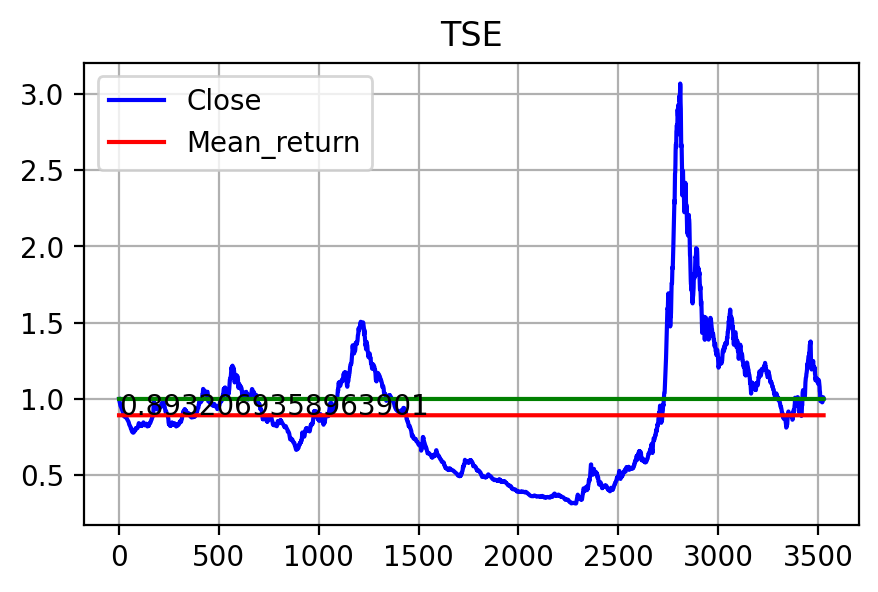

Gold_domestic


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11508\1640275509.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_data[f'exp_{i}'][j]=expected_data[f'exp_{i}'][j]*mean_col[i] ** j
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11508\1640275509.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_data[f'exp_{i}'][j]=expected_data[f'exp_{i}'][j]*mean_col[i] ** j
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11508\1640275509.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

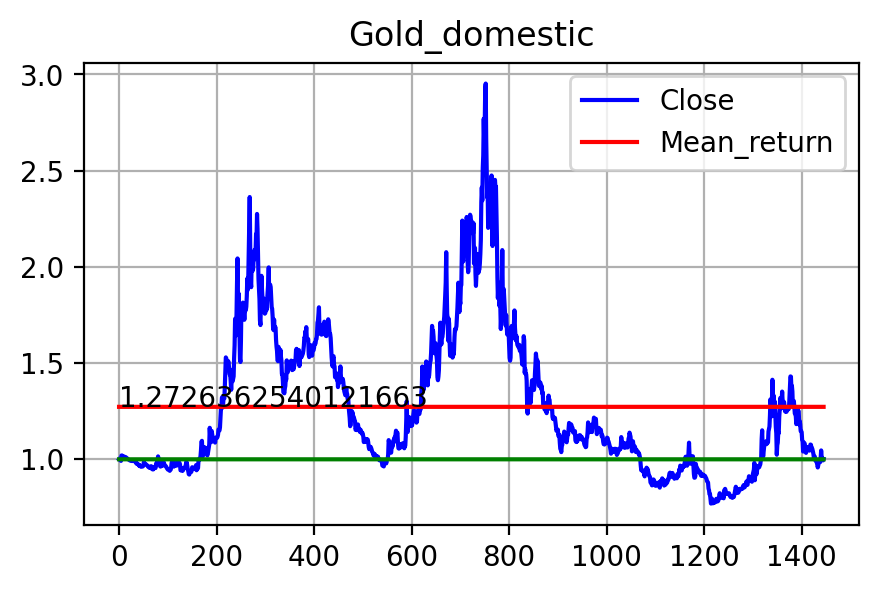

USDIRR


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11508\1640275509.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_data[f'exp_{i}'][j]=expected_data[f'exp_{i}'][j]*mean_col[i] ** j
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11508\1640275509.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_data[f'exp_{i}'][j]=expected_data[f'exp_{i}'][j]*mean_col[i] ** j
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11508\1640275509.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

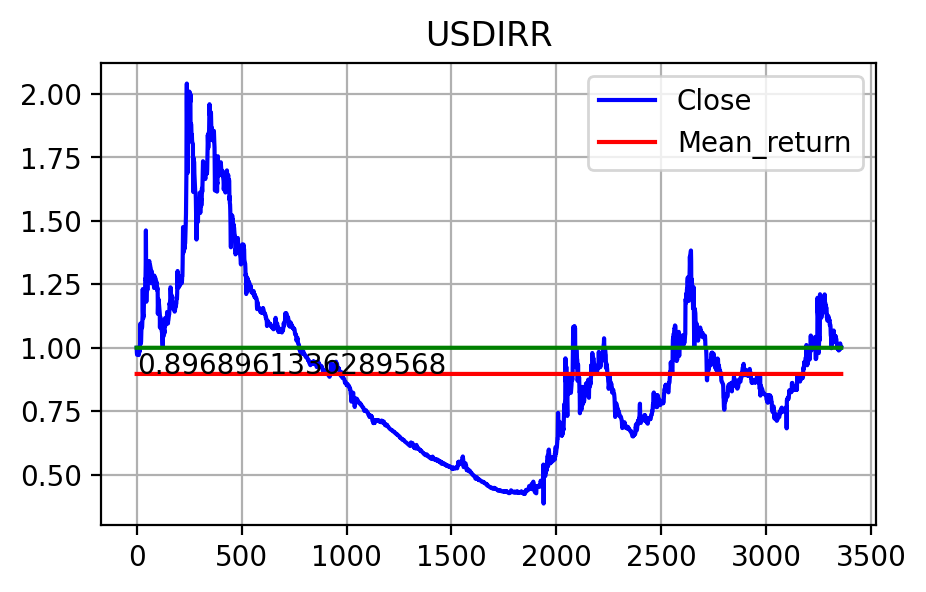

BITCOIN


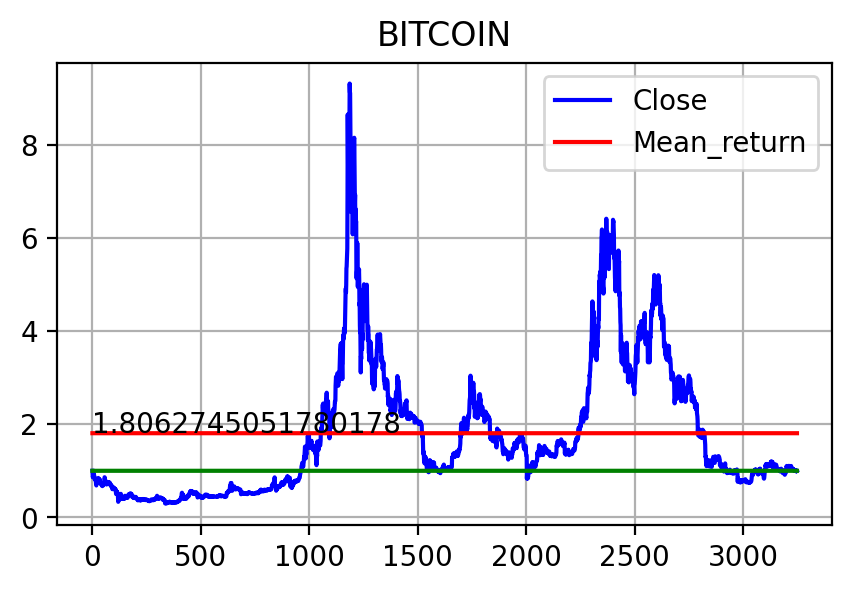

Gold_world


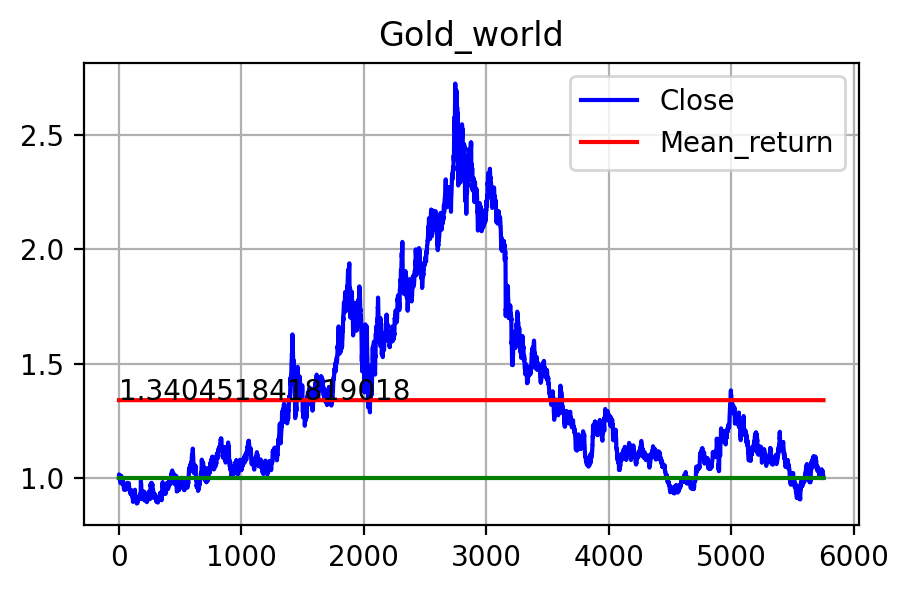

''

In [55]:
for l, k in enumerate(index_):
    print(name_dict[l])
    #preprocess
    for i in k.columns:
        for j in k.index:
            if type(k[i][j]) == type(''):
                k[i][j] = float(k[i][j])
    vol = 0
    if 'Volume' in k.columns:
        vol = k['Volume']
        k.drop('Volume', axis=1, inplace=True)
    #remove 0 form dataframe k
    for i in k.columns:
        k.drop(k[i][k[i] == 0].index, axis=0, inplace=True)

    # define columns of return dataframe of k
    mapper = {i: f'{i}_return_1d' for i in k.columns}

    #print(mapper)
    #build return dataframe of k
    data_exp = {f'{mapper[i]}': [1] for i in mapper.keys()}
    for i in k.columns:
        for j in range(1, len(k.index)):
            data_exp[mapper[i]].append(k[i][j] / k[i][j - 1])
        #calculuse of mean exponential of feature dataframe
    mean_col = {}
    #print(mean_col)
    #print(k.columns)
    for i in k.columns:
        mean_col[f'{i}'] = mean_exp(data_exp[f'{i}_return_1d'])

    #build expected values from mean exponential return
    expected_data = pd.DataFrame()
    for i in k.columns:
        expected_data[f'exp_{i}'] = [k[i][0]] * len(k.index)
        for j in range(len(k.index)):
            expected_data[f'exp_{i}'][j]=expected_data[f'exp_{i}'][j]*mean_col[i] ** j
    final_data = pd.DataFrame(k.values / expected_data.values, columns=k.columns, index=k.index)
    plt.figure(figsize=(5, 3), dpi=200)
    plt.plot(range(len(final_data.index)), final_data['Close'], c='blue')
    plt.plot([final_data['Close'].mean()] * len(final_data.index), c='red')
    plt.plot([1] * len(final_data.index), c='green')
    plt.legend(['Close', 'Mean_return'])
    plt.text(0, final_data['Close'].mean(), f"{final_data['Close'].mean()}", c='black')
    plt.title(name_dict[l])
#plt.xlable(f'last={for_export_data['<CLOSE>'][-1]}')
    plt.grid()
    plt.show()
    file = open('C:\\Users\ADMIN\Desktop\\tse2\\' + 'Expected-' + name_dict[l] + '.prn', 'w')
    file.write('<DTYYYYMMDD>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>')
    file.write('\n')
    for i in final_data.index:
        for j in final_data.columns:
            if j != final_data.columns[-1]:
                file.write(str(final_data[j][i]))
                file.write(',')
            else:
                file.write(str(final_data[j][i]))
        file.write('\n')
    file.close()
    time.sleep(10)
input('press any key to end :')

In [53]:
    '''expected_data = {}
    for i in k.columns:

        expected_data[f'exp_{i}'] = []
        for j in range(len(k.index)):
            expected_data[f'exp_{i}'].append(k[i][0] * mean_col[i] ** j)
        expected_data = pd.DataFrame(expected_data)'''

"expected_data = {}\nfor i in k.columns:\n\n    expected_data[f'exp_{i}'] = []\n    for j in range(len(k.index)):\n        expected_data[f'exp_{i}'].append(k[i][0] * mean_col[i] ** j)\n    expected_data = pd.DataFrame(expected_data)"

{'Open_return_1d': [1,
  1.003285848545234,
  1.0080058671934466,
  0.9956678259673962,
  0.9941987829704382,
  0.9992705609112802,
  0.9974452109232436,
  0.999268270404737,
  0.9992676228393952,
  0.9996335430349861,
  0.9985337466481562,
  0.9996328703900279,
  0.9966948441541296,
  1.0018422992308198,
  0.9893343362942905,
  1.0048326683753486,
  1.0055493898177639,
  1.0084621722363682,
  0.9992702947735225,
  1.0164293541448588,
  0.9967672632319848,
  0.9895495715442004,
  0.9934449443898835,
  0.9974340846012635,
  0.99411978659454,
  0.9992605833381469,
  0.9981502033940787,
  0.9974055532945751,
  1.0122630535790451,
  1.000367129609972,
  1.0055045871559634,
  1.0007299715585083,
  0.9901531287861773,
  0.9985267259797997,
  0.997048991912448,
  0.9992601490992065,
  1.0040725882216162,
  1.0018436577341239,
  0.9930069034644919,
  0.9866568726878522,
  0.999248639376937,
  0.9981203007518797,
  0.9954801800111818,
  1.0007567620744195,
  0.9977315459224362,
  1.001894657110

In [54]:
    '''expected_data = {}
for i in k.columns:
    expected_data[f'exp_{i}'] = []
    for j in range(len(k.index)):
        expected_data[f'exp_{i}'].append(k[i][0] * mean_col[i] ** j)
    expected_data = pd.DataFrame(expected_data)
if 'Volume' in k.columns:
    expected_data['Volume'] = vol.values
    expected_data.index = k.index'''


"expected_data = {}\nfor i in k.columns:\nexpected_data[f'exp_{i}'] = []\nfor j in range(len(k.index)):\n    expected_data[f'exp_{i}'].append(k[i][0] * mean_col[i] ** j)\nexpected_data = pd.DataFrame(expected_data)\nif 'Volume' in k.columns:\nexpected_data['Volume'] = vol.values\nexpected_data.index = k.index"

In [31]:
    final_data = pd.DataFrame(k.values / expected_data.values, columns=k.columns, index=k.index)
plt.figure(figsize=(5, 3), dpi=200)
plt.plot(range(len(final_data.index)), final_data['Close'], c='blue')
plt.plot([final_data['Close'].mean()] * len(final_data.index), c='red')
plt.plot([1] * len(final_data.index), c='green')
plt.legend(['Close', 'Mean_return'])
plt.text(0, final_data['Close'].mean(), f"{final_data['Close'].mean()}", c='black')
plt.title(name_dict[l])
#plt.xlable(f'last={for_export_data['<CLOSE>'][-1]}')
plt.grid()
plt.show()
file = open('C:\\Users\ADMIN\Desktop\\tse2\\' + 'Expected-' + name_dict[l] + '.prn', 'w')
file.write('<DTYYYYMMDD>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>')
file.write('\n')
for i in final_data.index:
    for j in final_data.columns:
        if j != final_data.columns[-1]:
            file.write(str(final_data[j][i]))
            file.write(',')
        else:
            file.write(str(final_data[j][i]))
    file.write('\n')
file.close()
time.sleep(10)
input('press any key to end :')

In [46]:
a=pd.DataFrame()

In [47]:
a['b']=np.arange(30)
a

,b
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [51]:
a['c']=[50]*30
a

,b,c
0,0,50
1,1,50
2,2,50
3,3,50
4,4,50
5,5,50
6,6,50
7,7,50
8,8,50
9,9,50
